# 1. Trabajo Práctico N°1: de Analisis + Visualización

El objetivo general del práctico es realizar una anáilsis exploratorio de las observaciones del dataset.

Se sugiere explorar las series de forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que nos ayude a modelar las series y hacer pronósticos.

Como los valores observados se indican en relación al tiempo, este tipo de datos se conocen como series temporales, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente tutorial puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

Para los siguientes puntos elija:

Un site por analizar
Un tipo de flujo de compra (compra directa versus modo carrito)
Dos plataformas ( Se sugiere tomar una Web Desktop o Mobile y otra de las applicaciones Android o iOS: Desktop vs Android
De necesitarlo deberá resamplear los valores a nivel de día como mínimo
Una vez ejecutado los pasos anteriores debería contar con 2 series temporales (y no todo el dataset) referidas al mismo pais pero en 2 plataformas diferentes.

En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo.

### Descripción de variables

Para describir el comportamienot de los usuarios usaremos 3 variales utilizadas como "indice compuesto"
- **Fecha**
- **flow**
- **Site**
- **Device**

| Nombre   |  Tipo  | Formato      | Descripción |
|:---------|:-------|:------------:|:------------|
| *Fecha   |  Date  |  YYYY-MM-DD  | Los valores corresponde a los eventos registrados durante este día |
| *flow    | String |  direct-cart | Define si el flujo corresponde a compra directa o de carrito      |
| *Site    | String |     XXX      | Describe el site al que corresponden las sesiones   |
| *Device  | String |              | Define el dispositivo donde se ejecuto el flujo de compra |
| Loading  | Entero |              | Cantidad de sesiones que vieron el paso de Loading  |
| Shipping | Entero |              | Cantidad de sesiones que vieron el paso de Shipping |
| Payments | Entero |              | Cantidad de sesiones que vieron el paso de Payments |
| Review   | Entero |              | Cantidad de sesiones que vieron el paso de Review   |
| Congrats | Entero |              | Cantidad de sesiones que vieron el paso de Congrats |

**Observaciones:**
- **Loading**
- **Shipping**
- **Payments**
- **Review**
- **Congrats**


# Análisis de los datos

In [187]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Configuraciones
plt.rcParams['figure.figsize'] = (9, 6) #Tamaño de los gráficos
pd.options.display.float_format = '{:20,.2f}'.format #configuración para sacar la notación cientifica

El primer paso es importar la base. En el mismo momento, se indexa la variable fecha para luego poder resamplear los datos.

In [189]:
traffic_data = pd.read_csv("datasets/traffic_AR_CL_UY.csv", usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], parse_dates=["Fecha"], index_col=["Fecha"])

In [190]:
traffic_data.head(10)

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290
2019-03-01,cart,MLA,iOS,0,1179,856,671,622
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856
2019-03-01,direct,MLA,Desktop,98263,93506,80994,63941,62256
2019-03-01,direct,MLA,Mobile,69273,65385,51310,35665,33229
2019-03-01,direct,MLA,iOS,29215,27378,23245,17899,16835
2019-03-01,direct,MLC,Desktop,14970,14818,12629,10444,9827


In [191]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7709 entries, 2019-03-01 to 2020-06-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flow      7709 non-null   object
 1   Site      7709 non-null   object
 2   Device    7709 non-null   object
 3   Loading   7709 non-null   int64 
 4   Shipping  7709 non-null   int64 
 5   Payments  7709 non-null   int64 
 6   Review    7709 non-null   int64 
 7   Congrats  7709 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 542.0+ KB


In [192]:
traffic_data["Weekday"] = traffic_data.index.day_name()
traffic_data["Month"] = traffic_data.index.month
traffic_data["Year"] = traffic_data.index.year

new = traffic_data["Month"].copy().astype(str)
new1 = traffic_data["Year"].copy().astype(str)

# concatenating team with name column
# overwriting name column
traffic_data["Months"]= new1.str.cat(new, sep ="-")

In [193]:
traffic_data

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Weekday,Month,Year,Months
Fecha,,,,,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731,Friday,3,2019,2019-3
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479,Friday,3,2019,2019-3
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290,Friday,3,2019,2019-3
2019-03-01,cart,MLA,iOS,0,1179,856,671,622,Friday,3,2019,2019-3
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856,Friday,3,2019,2019-3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,direct,MLC,iOS,29876,29952,25386,21049,19642,Tuesday,6,2020,2020-6
2020-06-30,direct,MLU,Android,30437,30534,24870,18660,17698,Tuesday,6,2020,2020-6
2020-06-30,direct,MLU,Desktop,9859,9767,8177,6690,6566,Tuesday,6,2020,2020-6


In [194]:
traffic_data.Site.value_counts()

MLA    3903
MLC    1910
MLU    1896
Name: Site, dtype: int64

In [195]:
# Como puede apreciarse, Mercado Libre Argentina es el sitio que cuenta con mas observaciones. Por este motivo,
# será objeto de análisis.

C:\Users\magda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Site', ylabel='count'>

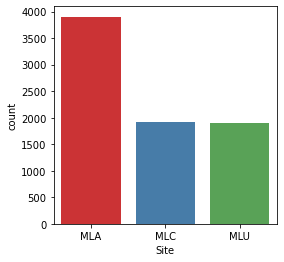

In [196]:
plt.rcParams['figure.figsize'] = (4, 4) #Tamaño de los gráficos

sns.countplot(traffic_data.Site, palette="Set1")

In [197]:
traffic_data.flow.value_counts()

direct    5746
cart      1963
Name: flow, dtype: int64

Lo mismo sucede con el flujo de compra directa, por lo que es elegida para analizarse.

C:\Users\magda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flow', ylabel='count'>

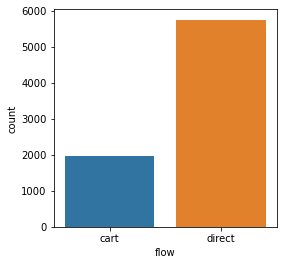

In [198]:
plt.rcParams['figure.figsize'] = (4,4) #Tamaño de los gráficos
sns.countplot(traffic_data.flow)

In [199]:
min=traffic_data.index.min()
print(min)
max=traffic_data.index.max()
print(max)
dif=(max-min).days
print("El periodo de tiempo analizado es de:", dif, "días")

2019-03-01 00:00:00
2020-06-30 00:00:00
El periodo de tiempo analizado es de: 487 días


In [200]:
gbd = traffic_data.groupby(by=['Site','flow','Device']).count().reset_index()
gbd.drop(['Shipping','Payments','Review','Congrats','Weekday'], axis='columns', inplace=True)


In [201]:
gbd

,Site,flow,Device,Loading,Month,Year,Months
0,MLA,cart,Android,488,488,488,488
1,MLA,cart,Desktop,488,488,488,488
2,MLA,cart,Mobile,487,487,487,487
3,MLA,cart,iOS,488,488,488,488
4,MLA,direct,Android,488,488,488,488
5,MLA,direct,Desktop,488,488,488,488
6,MLA,direct,Mobile,488,488,488,488
7,MLA,direct,iOS,488,488,488,488
8,MLC,cart,Desktop,6,6,6,6
9,MLC,cart,Mobile,6,6,6,6


C:\Users\magda\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


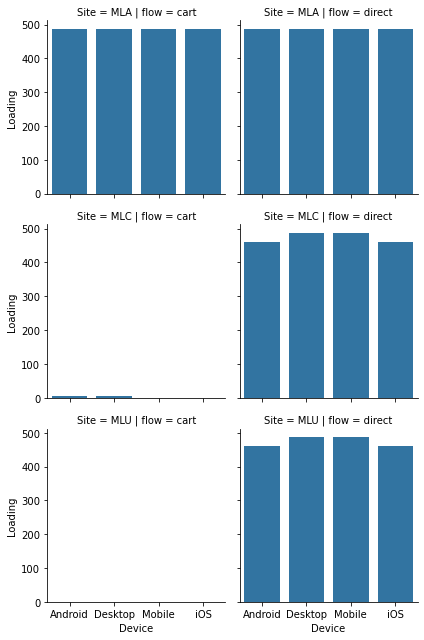

In [202]:
g = sns.FacetGrid(gbd, col="flow",  row="Site")
g.map(sns.barplot, "Device", "Loading")

Dado que el periodo bajo análisis es de 487 días, se trabajará con las plataformas Desktop y Android por no contar con valores
nulos.

Se definen 3 bases: una que contempla las dos plataformas -Desktop & Android- en conjunto y además, una con los datos
individuales de cada plataforma para analizarlas por separado. 

In [203]:
df_traffic=traffic_data[traffic_data.Site==("MLA")]
df_traffic=df_traffic[df_traffic.flow==("direct")]
df_traffic = df_traffic[(df_traffic.Device==("Android"))|(df_traffic.Device==("Desktop"))]
df_traffic["indice"] = df_traffic["Congrats"] / df_traffic["Loading"]

df_traffic_android = df_traffic[df_traffic.Device==("Android")]
df_traffic_desktop = df_traffic[df_traffic.Device==("Desktop")]

In [204]:
# YO SACARÍA ESTA PARTE

#Se proponen las siguientes actividades:

# Determine el tipo de variables y el período de tiempo bajo análisis
 
# Indague sobre la existencia de valores faltantes.

# ¿Cómo trataría a los faltantes? ¿Por qué? (El tratamiento de valores faltantes será parte del práctico de curación y 
# pueden omitirlos, en caso de necesitar inputar valores pueden tomar periodos que los omitan)

## Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística 
# descriptiva (por ejemplo: media, varianza y coeficiente de variación). Puede derivar alguna afirmación del análisis 
# de los coeficientes de asimetría y kurtosis

Como se mencionó anteriormente, el periodo de tiempo bajo análisis es de 487 días (16 meses). El tipo de variables con 
las que se trabajará, son las siguientes:

In [205]:
df_traffic_android.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2019-03-01 to 2020-06-30
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flow      488 non-null    object 
 1   Site      488 non-null    object 
 2   Device    488 non-null    object 
 3   Loading   488 non-null    int64  
 4   Shipping  488 non-null    int64  
 5   Payments  488 non-null    int64  
 6   Review    488 non-null    int64  
 7   Congrats  488 non-null    int64  
 8   Weekday   488 non-null    object 
 9   Month     488 non-null    int64  
 10  Year      488 non-null    int64  
 11  Months    488 non-null    object 
 12  indice    488 non-null    float64
dtypes: float64(1), int64(7), object(5)
memory usage: 53.4+ KB


In [206]:
df_traffic_desktop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 488 entries, 2019-03-01 to 2020-06-30
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flow      488 non-null    object 
 1   Site      488 non-null    object 
 2   Device    488 non-null    object 
 3   Loading   488 non-null    int64  
 4   Shipping  488 non-null    int64  
 5   Payments  488 non-null    int64  
 6   Review    488 non-null    int64  
 7   Congrats  488 non-null    int64  
 8   Weekday   488 non-null    object 
 9   Month     488 non-null    int64  
 10  Year      488 non-null    int64  
 11  Months    488 non-null    object 
 12  indice    488 non-null    float64
dtypes: float64(1), int64(7), object(5)
memory usage: 53.4+ KB


Para el caso de las variables elegidas no hay valores faltantes. Por esto, no se realizará un tratamiento especial.

En primer lugar, para ver el comportamiento de los datos como serie de tiempo, se realiza un gráfico de líneas. A los fines
de quitar el ruido de la frecuencia diaria de los datos, se resamplea la base con el promedio de ventas semanal y se grafica
la totalidad del periodo bajo análisis.

Text(0, 0.5, 'Cantidad de Ventas')

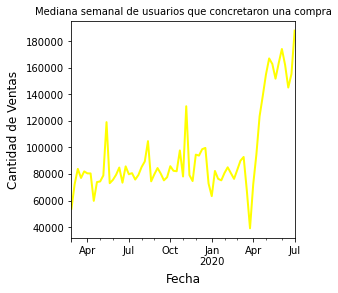

In [207]:
df_traffic_weekly_median=df_traffic.resample("W").median()
df_traffic_weekly_median.Congrats.plot(color = "#ffff00", lw = 2)
plt.title('Mediana semanal de usuarios que concretaron una compra', size = 10)
plt.xlabel('Fecha', size = 12, labelpad = 6)
plt.ylabel('Cantidad de Ventas', size = 12, labelpad = 6)

Si se quiere ver el comportamiento de las ventas en el año 2020:

Text(0, 0.5, 'Cantidad de Ventas')

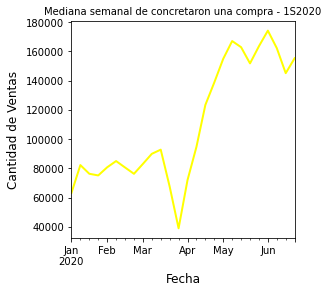

In [208]:
df_traffic_weekly_median['2020-01-01':'2020-06-30'].Congrats.plot(color = "#ffff00", lw = 2)
plt.title('Mediana semanal de concretaron una compra - 1S2020', size = 10)
plt.xlabel('Fecha', size = 12, labelpad = 6)
plt.ylabel('Cantidad de Ventas', size = 12, labelpad = 6)

Comparación de Histogramas Pre y Post Pandemia

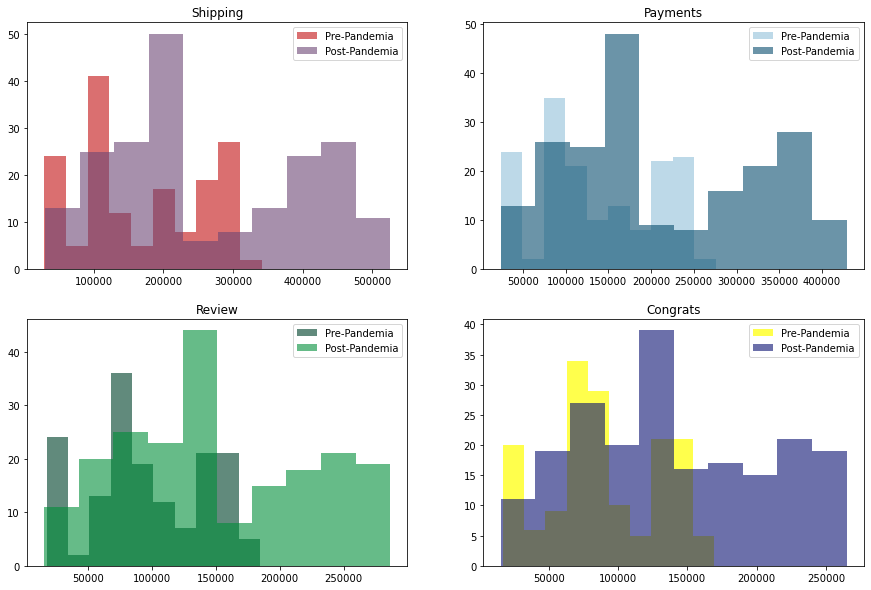

In [209]:
plt.rcParams['figure.figsize'] = (15, 10) #Tamaño de los gráficos

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df_traffic['2020-01-01':'2020-03-20']['Shipping'], label='Pre-Pandemia', alpha= 0.7, color= "#cb3234")
axs[0, 0].hist(df_traffic['2020-03-21':'2020-06-30']['Shipping'], label='Post-Pandemia', alpha = 0.6, color= "#6c4675")
axs[0, 0].set_title('Shipping')
axs[0, 0].legend(loc="upper right")
axs[0, 1].hist(df_traffic['2020-01-01':'2020-03-20']['Payments'], label='Pre-Pandemia', alpha = 0.7, color= "#a2cadf")
axs[0, 1].hist(df_traffic['2020-03-21':'2020-06-30']['Payments'], label='Post-Pandemia', alpha = 0.6, color= "#084d6e")
axs[0, 1].set_title('Payments')
axs[0, 1].legend(loc="upper right")
axs[1, 0].hist(df_traffic['2020-01-01':'2020-03-20']['Review'], label='Pre-Pandemia', alpha = 0.7, color= "#1e5945")
axs[1, 0].hist(df_traffic['2020-03-21':'2020-06-30']['Review'], label='Post-Pandemia', alpha = 0.6, color= "#008f39")
axs[1, 0].set_title('Review')
axs[1, 0].legend(loc="upper right")
axs[1, 1].hist(df_traffic['2020-01-01':'2020-03-20']['Congrats'], label='Pre-Pandemia', alpha = 0.7, color= "#ffff00")
axs[1, 1].hist(df_traffic['2020-03-21':'2020-06-30']['Congrats'], label='Post-Pandemia', alpha = 0.6, color= "#0a1172")
axs[1, 1].set_title('Congrats')
axs[1, 1].legend(loc="upper right")

La comparación de los histogramas en los periodos pre y post pandemia, nos muestran claramente que luego de ser decretada
la cuarentena en Argentina, la compra online se volvió mas popular. Esto también puede verse en la diferencia de medias para 
los periodos bajo análisis.

In [210]:
media_pre = df_traffic['2020-01-01':'2020-03-20']['Shipping'].mean()
media_post = df_traffic['2020-03-11':'2020-06-30']['Shipping'].mean()

txt1 = "El promedio de usuarios que realizaron una compra en 2 meses y medio antes de la pandemia era de {:,.2f}, mientras que el promedio 2 meses y medio luego, fue de {:,.2f}".format(media_pre, media_post)

print(txt1)

El promedio de usuarios que realizaron una compra en 2 meses y medio antes de la pandemia era de 170,414.62, mientras que el promedio 2 meses y medio luego, fue de 252,926.08


Gráficamente se puede ver observar, por ejemplo, que dada la diferencia en la mediana de cada variable, 
hay muchos mas usuarios que ingresan a la plataforma que los que terminan concretando una compra.

<AxesSubplot:>

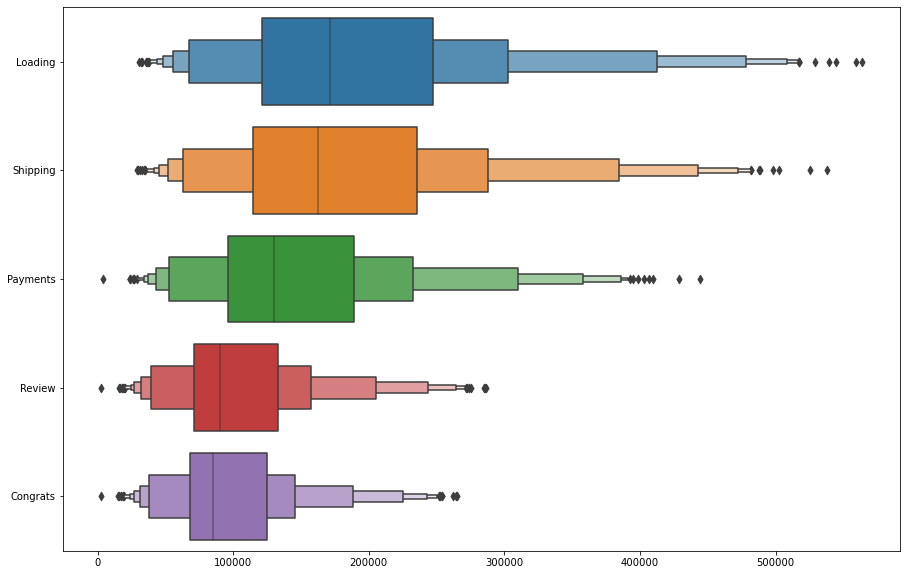

In [211]:
sns.boxenplot(data=df_traffic[['Loading','Shipping','Payments','Review','Congrats']], orient="h")

Text(0.5, 1.0, 'Desktop')

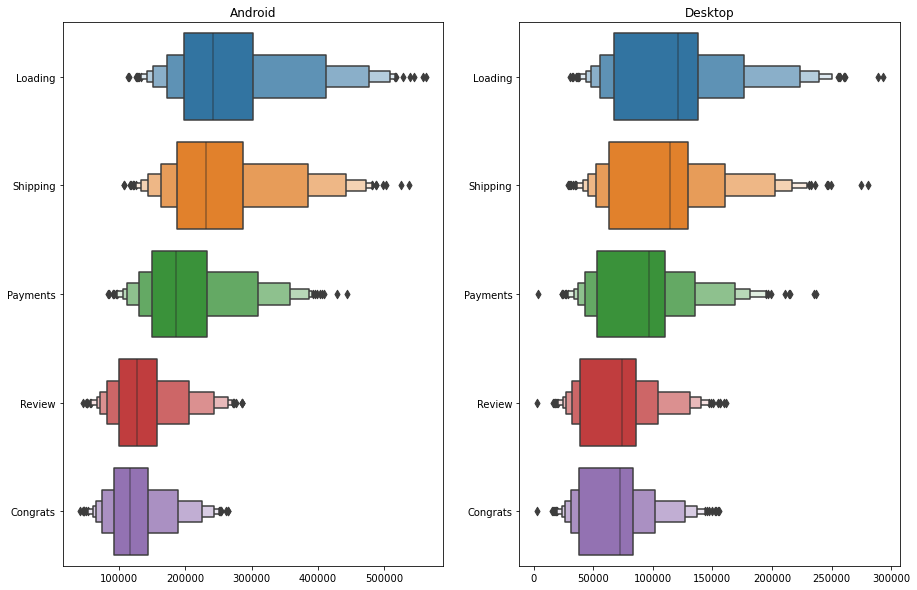

In [212]:
f, axes = plt.subplots(1, 2)
sns.boxenplot(data=df_traffic[['Loading','Shipping','Payments','Review','Congrats']][df_traffic.Device=="Android"], orient="h", ax=axes[0]).set_title('Android')
sns.boxenplot(data=df_traffic[['Loading','Shipping','Payments','Review','Congrats']][df_traffic.Device=="Desktop"], orient="h", ax=axes[1]).set_title('Desktop')

Se puede observar en el caso de Desktop como los datos para cada etapa presentan Asimetría negativa. 
Los datos se concentran en la parte superior de la distribución y la mediana suele ser mayor que la media. Esto supondría
que la media se encuentra sesgada por valores que escapan de lo normal, por lo que la mediana suele ser mas representativa
del comportamiento de la variable.

Algunas medidas descriptivas:

In [213]:
df_traffic.groupby(["Site","flow","Device"]).describe().Congrats

count                 mean  \
Site flow   Device                                              
MLA  direct Android               488.00           124,947.73   
            Desktop               488.00            69,503.27   

                                     std                  min  \
Site flow   Device                                              
MLA  direct Android            48,550.66            41,229.00   
            Desktop            31,425.06             2,538.00   

                                     25%                  50%  \
Site flow   Device                                              
MLA  direct Android            91,602.75           116,846.50   
            Desktop            38,027.00            72,425.00   

                                     75%                  max  
Site flow   Device                                             
MLA  direct Android           143,761.25           264,742.00  
            Desktop            83,054.00           155,820.00

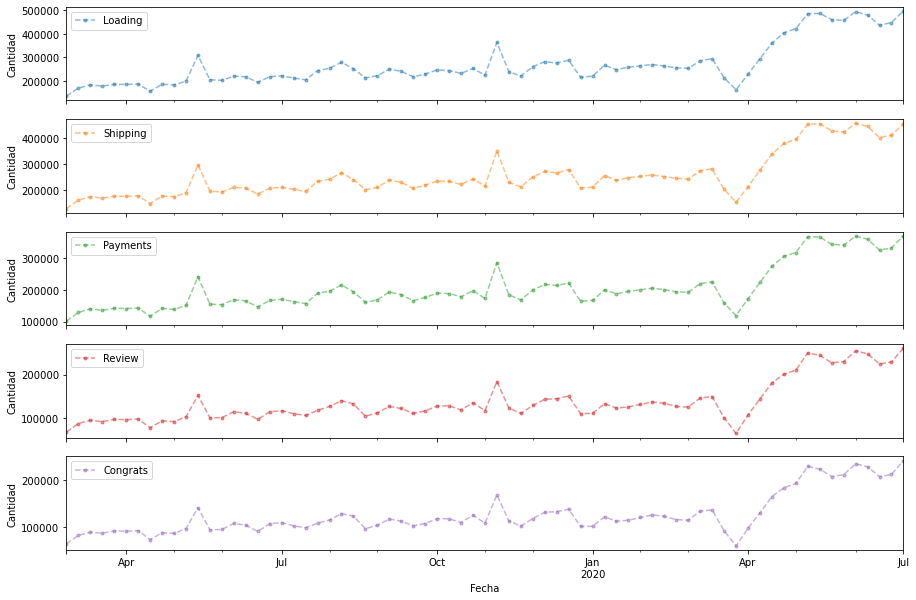

In [214]:
df_traffic_android_weekly_mean=df_traffic_android.resample("w").mean()

cols_plot = ['Loading', 'Shipping', 'Payments', 'Review', 'Congrats']

axes = df_traffic_android_weekly_mean[cols_plot].plot(marker='.', alpha=0.5, linestyle='--', figsize=(15,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Cantidad')

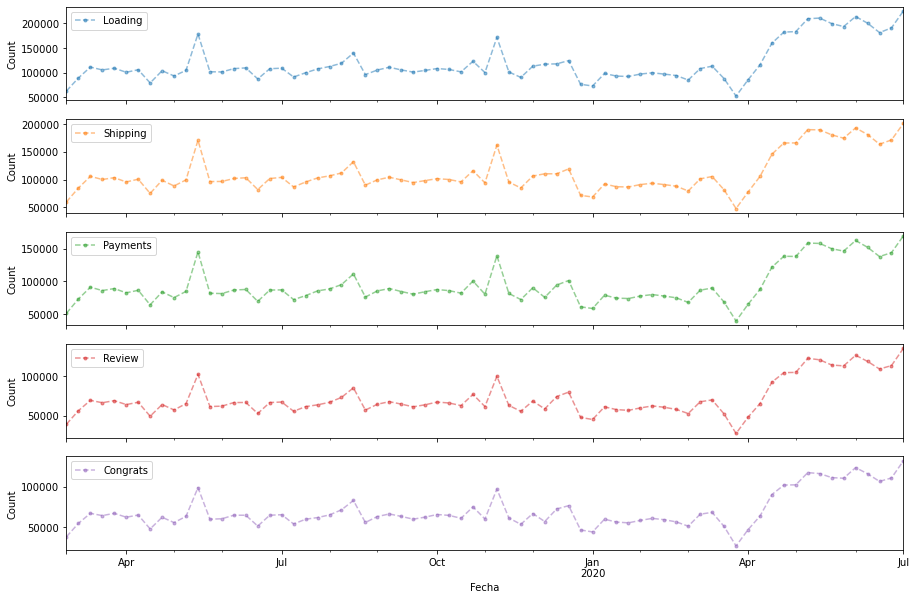

In [215]:
df_traffic_desktop_weekly_mean=df_traffic_desktop.resample("W").mean()

cols_plot = ['Loading', 'Shipping', 'Payments', 'Review', 'Congrats']

axes = df_traffic_desktop_weekly_mean[cols_plot].plot(marker='.', alpha=0.5, linestyle='--', figsize=(15,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Count')

# Outliers

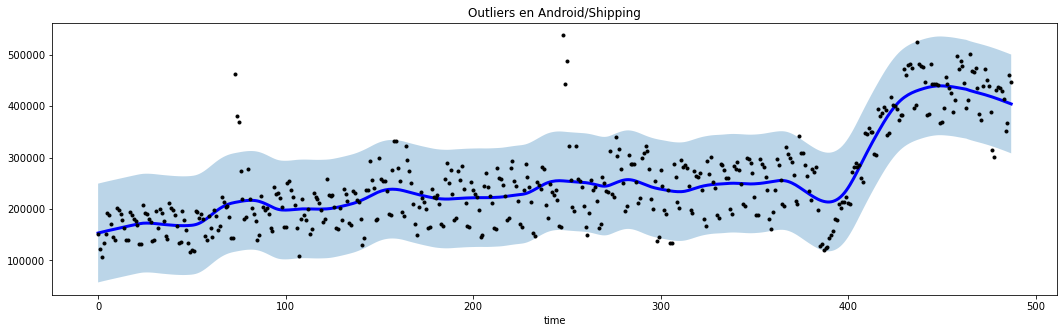

In [216]:
das1 = df_traffic.loc[df_traffic["Device"] == "Android" ]['Shipping'].to_frame()
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(das)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.title(f"Outliers en Android/Shipping"); plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

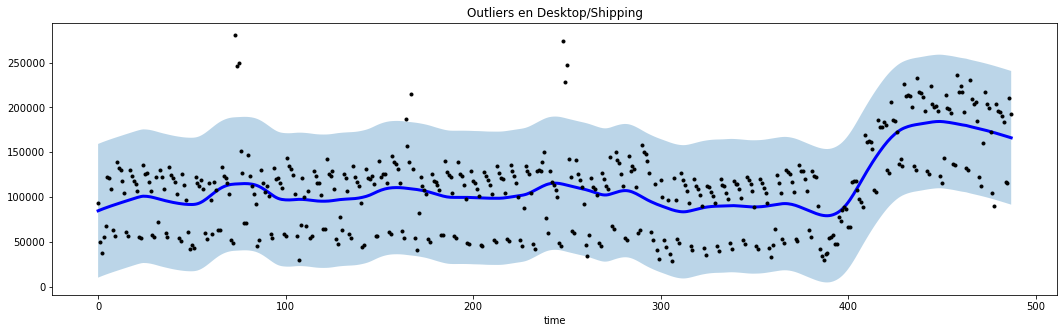

In [217]:
das2 = df_traffic.loc[df_traffic["Device"] == "Desktop" ]['Shipping'].to_frame()
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(das2)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.title(f"Outliers en Desktop/Shipping"); plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

A modo de ejemplo se plotearon las series de shipping para ambos devices. En ambos casos se pueden observar outliers, pero en su mayoría los mismos son outliers superiores a las series.
Esos valores suelen coincidir con black fridays o cyber mondays, y por su importancia para el negocio no serán eliminados, ya que muestran transacciones superiores a la media. 


# Comportamiento por mes

In [218]:
df_traffic.head()

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Weekday,Month,Year,Months,indice
Fecha,,,,,,,,,,,,,
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856,Friday,3,2019,2019-3,0.52
2019-03-01,direct,MLA,Desktop,98263,93506,80994,63941,62256,Friday,3,2019,2019-3,0.63
2019-03-02,direct,MLA,Android,130042,122965,97941,65134,60631,Saturday,3,2019,2019-3,0.47
2019-03-02,direct,MLA,Desktop,51778,49285,41652,30945,30009,Saturday,3,2019,2019-3,0.58
2019-03-03,direct,MLA,Android,113526,106599,83077,51557,47156,Sunday,3,2019,2019-3,0.42


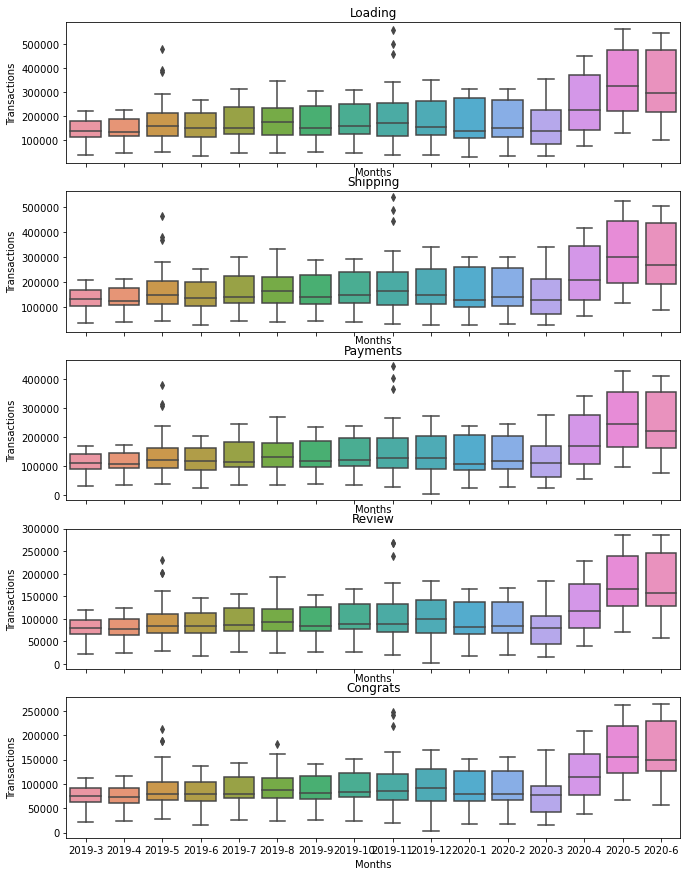

In [232]:
fig, axes = plt.subplots(5, 1, figsize=(11, 15), sharex=True)
for name, ax in zip(['Loading','Shipping','Payments','Review','Congrats'], axes):
    sns.boxplot(data=df_traffic, x='Months', y=name, ax=ax)
    ax.set_ylabel('Transactions')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

Como podemos observar en los gráficos anteriores, la distribución de la cantidad de transacciones no es simétrica en la mayoría de los meses, sino que están sesgadas hacia abajo, es decir que la mediana de transacciones será menor que la media en estos meses.
En cuanto a la tendencia de los datos, se puede observar una tendencia ligeramente creciente antes de la pandemia, con una profunda caída en marzo de 2020, para luego experimentar un gran salto.


# Cono de conversión

In [227]:
filtered_melted_pre = pd.melt(df_traffic['2020-01-01':'2020-03-20'].reset_index(), id_vars=["Fecha","Device"], value_vars=["Loading", "Shipping", "Payments", "Review", "Congrats"],value_name="Transactions")
filtered_melted_pre.columns
filtered_melted_pre['variable'] = pd.Categorical(filtered_melted_pre['variable'], categories=["Loading", "Shipping", "Payments", "Review", "Congrats"], ordered=True)
df2_pre = filtered_melted_pre.groupby(by=['Device','variable']).sum().reset_index()
df2a_pre = df2_pre.loc[df2_pre['Device']=='Android']
df2d_pre = df2_pre.loc[df2_pre['Device']=='Desktop']


In [228]:
from plotly import graph_objects as go

#prepandemia

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Desktop',
    y =["Loading", "Shipping", "Payments", "Review", "Congrats"  ],
    x = df2d_pre['Transactions'],
    textinfo = "value+percent initial",marker = {"color": ["#2874A6", "#2471A3", "#2980B9", "#5499C7", "#5499C7"]}))

fig.add_trace(go.Funnel(
    name = 'Android',
    orientation = "h",
    y = ["Loading", "Shipping", "Payments", "Review", "Congrats"  ],
    x = df2a_pre['Transactions'],
    textposition = "inside",
    textinfo = "value+percent initial",marker = {"color": ["#239B56",'#2ECC71', "#58D68D", "#82E0AA", "#ABEBC6"]}))


fig.show()


In [229]:
filtered_melted_pos = pd.melt(df_traffic['2020-03-21':'2020-06-30'].reset_index(), id_vars=["Fecha","Device"], value_vars=["Loading", "Shipping", "Payments", "Review", "Congrats"],value_name="Transactions")
filtered_melted_pos.columns
filtered_melted_pos['variable'] = pd.Categorical(filtered_melted_pos['variable'], categories=["Loading", "Shipping", "Payments", "Review", "Congrats"], ordered=True)
df2_pos = filtered_melted_pos.groupby(by=['Device','variable']).sum().reset_index()
df2a_pos = df2_pos.loc[df2_pos['Device']=='Android']
df2d_pos = df2_pos.loc[df2_pos['Device']=='Desktop']


In [230]:
#prepandemia

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Desktop',
    y =["Loading", "Shipping", "Payments", "Review", "Congrats"  ],
    x = df2d_pos['Transactions'],
    textinfo = "value+percent initial",marker = {"color": ["#2874A6", "#2471A3", "#2980B9", "#5499C7", "#5499C7"]}))

fig.add_trace(go.Funnel(
    name = 'Android',
    orientation = "h",
    y = ["Loading", "Shipping", "Payments", "Review", "Congrats"  ],
    x = df2a_pos['Transactions'],
    textposition = "inside",
    textinfo = "value+percent initial",marker = {"color": ["#239B56",'#2ECC71', "#58D68D", "#82E0AA", "#ABEBC6"]}))


fig.show()


En los gráficos anteriores se muestra el cono de conversión para las dos plataformas analizadas, Desktop y Android, para los períodos pre y pos pandemia. En general, no hay grandes cambios en el cono de conversión entre el primer y el último paso, si bien se ve que se pierden más compradores en las primeras etapas luego del comienzo de la pandemia.
Si comparamos devices, se puede decir que si bien desktop tiene una menor cantidad de usuarios, la tasa de conversión que presenta es más de un 10% superior a la de android. 